# Applying Machine Learning Model: Logistic Regression
On the previous phases, we cleaned and pre-processed our data in order to prepare for this phase. Now let's start building a logistic regression model to predict which employee will stay or leave the company.

## Importing the Preprocessed Dataset
Let's start by loading the preprocessed dataset from the previous phase into a `Pandas.DataFrame` then convert it to plain `Numpy.ndarray`.

In [1]:
# Import the Features and Targets
import pandas as pd
import numpy as np
import seaborn as sns

X_train = pd.read_csv("../dataset/preprocessed/Features_Training_Set.csv", index_col=0).to_numpy()
X_test = pd.read_csv("../dataset/preprocessed/Features_Testing_Set.csv", index_col=0).to_numpy()
y_train = pd.read_csv("../dataset/preprocessed/Target_Training_Set.csv", index_col=0).to_numpy().ravel()
y_test = pd.read_csv("../dataset/preprocessed/Target_Testing_Set.csv", index_col=0).to_numpy().ravel()

## Training the Model
Once loaded, let's initialize our model, train it on our training set, and predict using our testing set.

In [2]:
# Train the logistic regression model
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

## Evaluating the Model
After training and prediction, let's see how our model performs. Since our target variable `Attrition` only contains two values, we could categorize this machine learning problem as a *classification* problem. Thus we will be using *accuracy*, *precision*, *recall*, and *f1* score. We will also view the confusion matrix to quantify the amoun of correct and incorrect prediction of the model.

In [3]:
# Show the metrics of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

RESULTS_BASELINE = pd.DataFrame({
  "Metric": ["Accuracy", "Precision", "Recall", "F1"],
  "Value": [metric(y_true=y_test, y_pred=y_pred) for metric in [accuracy_score, precision_score, recall_score, f1_score]]
})

RESULTS_BASELINE.to_csv("../dataset/model-results/LogisticRegression.csv")

RESULTS_BASELINE

,Metric,Value
0,Accuracy,0.781377
1,Precision,0.761905
2,Recall,0.800000
3,F1,0.780488


### Model Accuracy
based on the results above, our model was able to correctly predict 78.13% of the testing set.

### Model Precision
Out of all the employees predicted to leave the company, only 76.19% of them actually left the company.

### Model Recall
Out of all the predicted employees, 80.00% of them left the company.

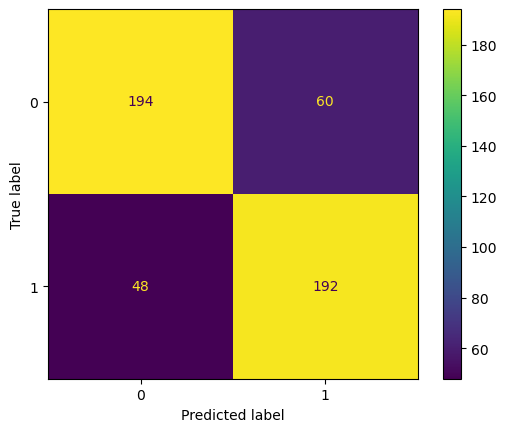

In [4]:
# Plot the confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
heatmap = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
heatmap.plot();

In [5]:
pd.DataFrame({
  "Prediction Metric": ["True Negative", "False Positve", "False Negative", "True Positive"],
  "Prediction Count": [194, 60, 48,192]
})

,Prediction Metric,Prediction Count
0,True Negative,194
1,False Positve,60
2,False Negative,48
3,True Positive,192


In [6]:
# Show the classification report
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       254
           1       0.76      0.80      0.78       240

    accuracy                           0.78       494
   macro avg       0.78      0.78      0.78       494
weighted avg       0.78      0.78      0.78       494



## Closing
In this section, we are able to generate a logistic regression model and asses it. Without any optimization on the model, we are able to achieve a low overall accuracy, precision, and recall. If we want to improve the capability to predict which employees were about to leave the company, we can either (1) conduct feature engineering on our dataset, (2) optimize our model, (3) try out other algorithms. Once we are able to decide which model to use, we will proceed to the next phase which is model understanding.